In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sae_cooccurrence.utils.set_paths import get_git_root

In [3]:
# set seed
np.random.seed(42)

# Analyse results of normalised features generation

In [17]:
# TODO: get same experiments profiling this from old compare_gemma_gpt notebook

git_root = get_git_root()

results_gpt2_layer8 = os.path.join(
    git_root,
    "results/gpt2-small/res-jb-feature-splitting/blocks_8_hook_resid_pre_24576",
)

results_path_layer_0 = os.path.join(
    git_root,
    "results/gemma-2-2b/gemma-scope-2b-pt-res-canonical/layer_0_width_16k_canonical",
)

results_path_layer_18_with_special = os.path.join(
    git_root,
    "results/gemma-2-2b/gemma-scope-2b-pt-res-canonical/profiling_test_data/layer_18_width_16k_canonical",
)

results_path_layer_18_no_bos = os.path.join(
    git_root,
    "results/gemma-2-2b/gemma-scope-2b-pt-res-canonical/bos_removed/layer_18_width_16k_canonical",
)

results_path_layer_18_no_special = os.path.join(
    git_root,
    "results/gemma-2-2b/gemma-scope-2b-pt-res-canonical/layer_18_width_16k_canonical",
)

gpt2_threshold = 1.5  # Adjust this based on your specific threshold
gemma_threshold = 10.0  # Adjust this based on your specific threshold
gpt2_threshold_safe = str(gpt2_threshold).replace(".", "_")
gemma_threshold_safe = str(gemma_threshold).replace(".", "_")
raw_file_path_gpt2_layer8 = (
    f"{results_gpt2_layer8}/feature_acts_cooc_total_threshold_{gpt2_threshold_safe}.npz"
)
raw_file_path_layer_0 = f"{results_path_layer_0}/feature_acts_cooc_total_threshold_{gemma_threshold_safe}.npz"
raw_file_path_layer_18_with_special = f"{results_path_layer_18_with_special}/feature_acts_cooc_total_threshold_{gemma_threshold_safe}.npz"
raw_file_path_layer_18_no_bos = f"{results_path_layer_18_no_bos}/feature_acts_cooc_total_threshold_{gemma_threshold_safe}.npz"
raw_file_path_layer_18_no_special = f"{results_path_layer_18_no_special}/feature_acts_cooc_total_threshold_{gemma_threshold_safe}.npz"
raw_file_path_gpt2_layer8 = (
    f"{results_gpt2_layer8}/feature_acts_cooc_total_threshold_{gpt2_threshold_safe}.npz"
)
jaccard_file_path_layer_0 = f"{results_path_layer_0}/feature_acts_cooc_jaccard_threshold_{gemma_threshold_safe}.npz"
jaccard_file_path_layer_18_with_special = f"{results_path_layer_18_with_special}/feature_acts_cooc_jaccard_threshold_{gemma_threshold_safe}.npz"
jaccard_file_path_layer_18_no_bos = f"{results_path_layer_18_no_bos}/feature_acts_cooc_jaccard_threshold_{gemma_threshold_safe}.npz"
jaccard_file_path_layer_18_no_special = f"{results_path_layer_18_no_special}/feature_acts_cooc_jaccard_threshold_{gemma_threshold_safe}.npz"

with np.load(raw_file_path_gpt2_layer8) as data:
    raw_matrix_gpt2_layer8 = data["arr_0"]
# with np.load(raw_file_path_layer_0) as data:
#     raw_matrix_layer_0 = data["arr_0"]
with np.load(raw_file_path_layer_18_with_special) as data:
    raw_matrix_layer_18_with_special = data["arr_0"]
with np.load(raw_file_path_layer_18_no_bos) as data:
    raw_matrix_layer_18_no_bos = data["arr_0"]
with np.load(raw_file_path_layer_18_no_special) as data:
    raw_matrix_layer_18_no_special = data["arr_0"]
# with np.load(jaccard_file_path_layer_0) as data:
#     jaccard_matrix_layer_0 = data["arr_0"]
with np.load(jaccard_file_path_layer_18_with_special) as data:
    jaccard_matrix_layer_18_with_special = data["arr_0"]
with np.load(jaccard_file_path_layer_18_no_bos) as data:
    jaccard_matrix_layer_18_no_bos = data["arr_0"]
with np.load(jaccard_file_path_layer_18_no_special) as data:
    jaccard_matrix_layer_18_no_special = data["arr_0"]

# np.fill_diagonal(raw_matrix_layer_0, 0)
# np.fill_diagonal(jaccard_matrix_layer_0, 0)
np.fill_diagonal(raw_matrix_layer_18_with_special, 0)
np.fill_diagonal(jaccard_matrix_layer_18_with_special, 0)
np.fill_diagonal(raw_matrix_layer_18_no_bos, 0)
np.fill_diagonal(jaccard_matrix_layer_18_no_bos, 0)
np.fill_diagonal(raw_matrix_layer_18_no_special, 0)
np.fill_diagonal(jaccard_matrix_layer_18_no_special, 0)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


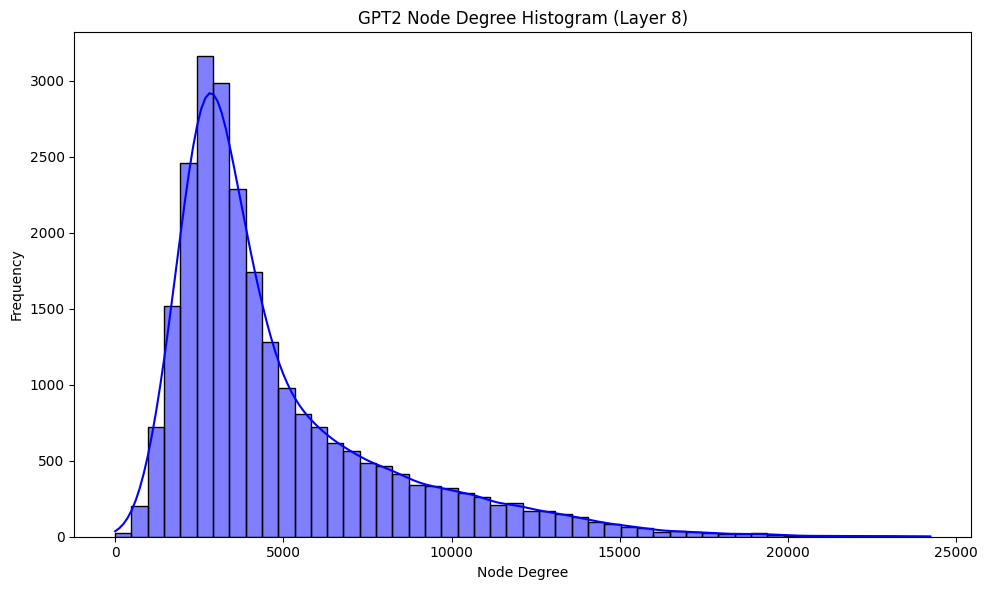

In [22]:
# Plotting histogram of node degree for GPT2
fig, ax = plt.subplots(figsize=(10, 6))

# Correct calculation of node degrees for GPT2
degrees_gpt2_layer8 = (
    np.sum(raw_matrix_gpt2_layer8 > 0, axis=1) - 1
)  # Subtract 1 to exclude self-connections

# Plotting for GPT2
sns.histplot(degrees_gpt2_layer8, ax=ax, bins=50, kde=True, color="blue")
ax.set_title("GPT2 Node Degree Histogram (Layer 8)")
ax.set_xlabel("Node Degree")
ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

/Users/matthew/Library/Caches/pypoetry/virtualenvs/sae-cooccurence-DZTJ6ajw-py3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/matthew/Library/Caches/pypoetry/virtualenvs/sae-cooccurence-DZTJ6ajw-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


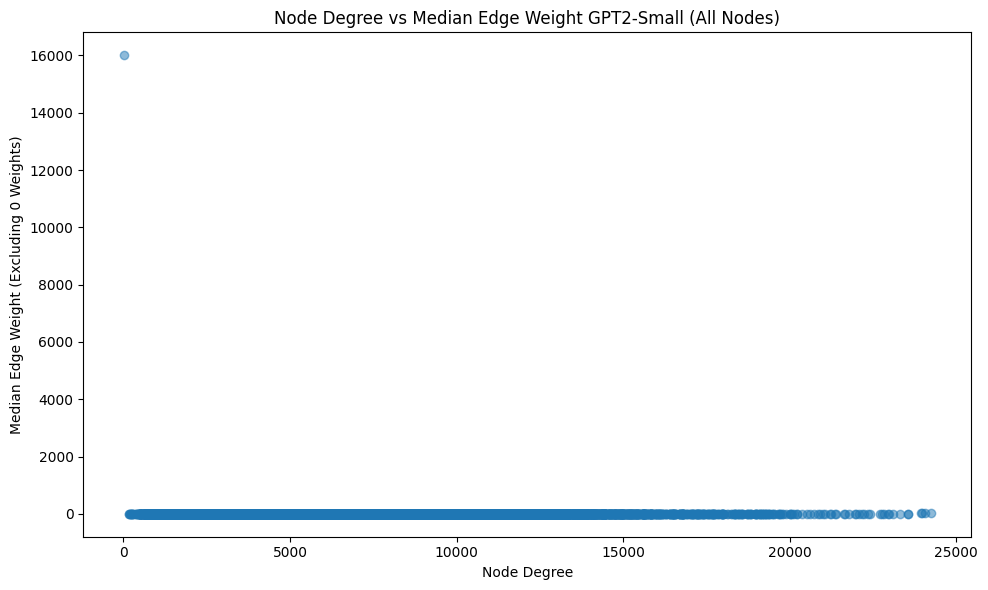

Correlation coefficient between node degree and median edge weight (excluding 0 weights): nan


In [28]:
# Calculate node degrees and median edge weights for all nodes, excluding 0 weight edges
degrees = (
    np.sum(raw_matrix_gpt2_layer8 > 0, axis=1) - 1
)  # Subtract 1 to exclude self-connections
median_weights = np.array([np.median(row[row > 0]) for row in raw_matrix_gpt2_layer8])

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(degrees, median_weights, alpha=0.5)
plt.xlabel("Node Degree")
plt.ylabel("Median Edge Weight (Excluding 0 Weights)")
plt.title("Node Degree vs Median Edge Weight GPT2-Small (All Nodes)")

# Add a trend line
z = np.polyfit(degrees, median_weights, 1)
p = np.poly1d(z)
plt.plot(degrees, p(degrees), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

# Print correlation coefficient
correlation = np.corrcoef(degrees, median_weights)[0, 1]
print(
    f"Correlation coefficient between node degree and median edge weight (excluding 0 weights): {correlation:.4f}"
)

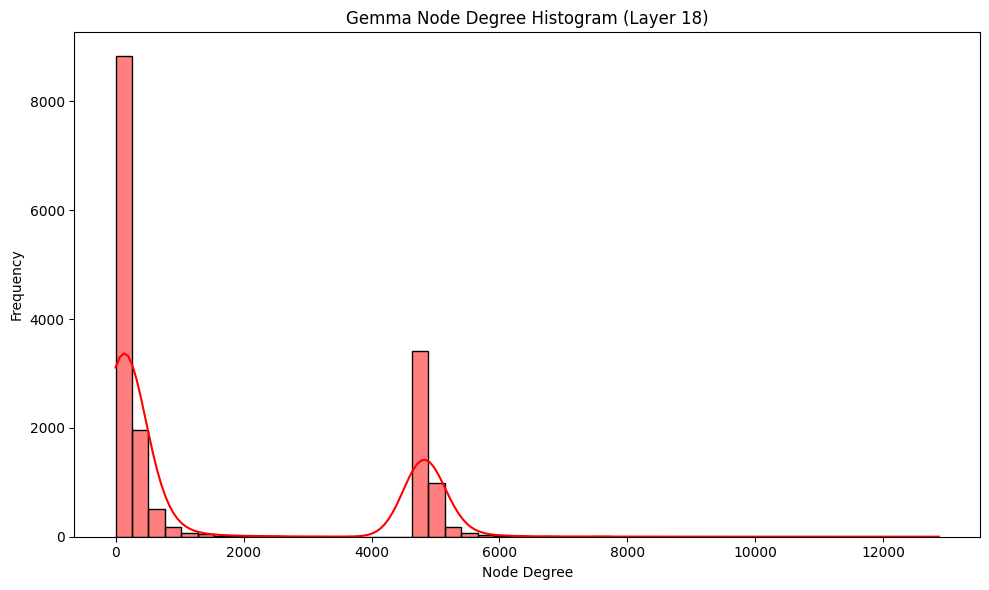

Total number of features: 16384
Maximum degree: 12868
Minimum degree: -1
Average degree: 1548.80
Median degree: 216.0


In [20]:
# Plotting histogram of node degree for Gemma
fig, ax = plt.subplots(figsize=(10, 6))

# Correct calculation of node degrees
degrees_layer_18 = (
    np.sum(raw_matrix_layer_18_with_special > 0, axis=1) - 1
)  # Subtract 1 to exclude self-connections

# Plotting for Gemma
sns.histplot(degrees_layer_18, ax=ax, bins=50, kde=True, color="red")
ax.set_title("Gemma Node Degree Histogram (Layer 18)")
ax.set_xlabel("Node Degree")
ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# Print some statistics
print(f"Total number of features: {len(degrees_layer_18)}")
print(f"Maximum degree: {np.max(degrees_layer_18)}")
print(f"Minimum degree: {np.min(degrees_layer_18)}")
print(f"Average degree: {np.mean(degrees_layer_18):.2f}")
print(f"Median degree: {np.median(degrees_layer_18)}")

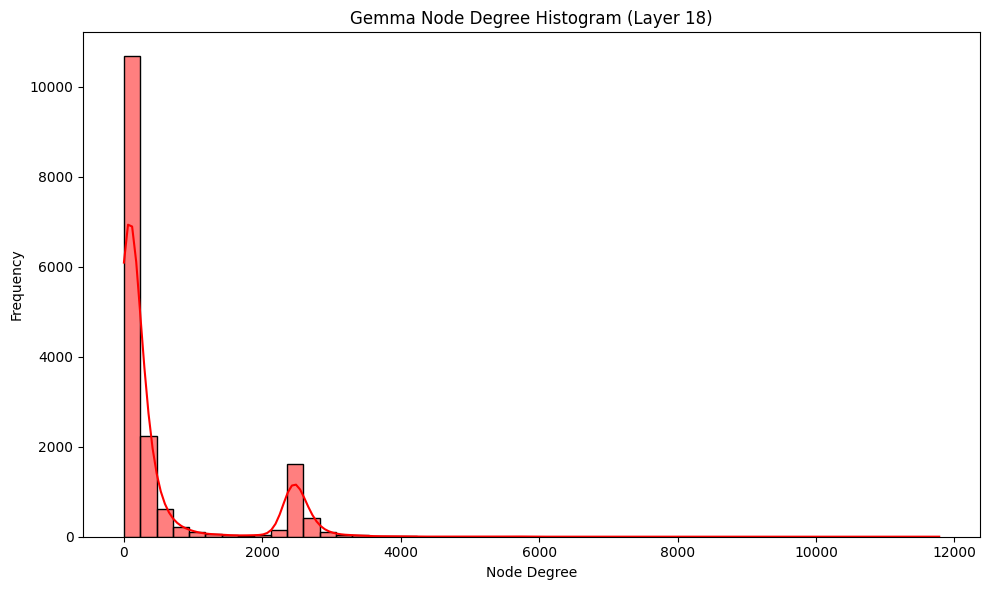

Total number of features: 16384
Maximum degree: 11780
Minimum degree: -1
Average degree: 530.67
Median degree: 133.0


In [23]:
# Plotting histogram of node degree for Gemma
fig, ax = plt.subplots(figsize=(10, 6))

# Correct calculation of node degrees
degrees_layer_18 = (
    np.sum(raw_matrix_layer_18_no_bos > 0, axis=1) - 1
)  # Subtract 1 to exclude self-connections

# Plotting for Gemma
sns.histplot(degrees_layer_18, ax=ax, bins=50, kde=True, color="red")
ax.set_title("Gemma Node Degree Histogram (Layer 18)")
ax.set_xlabel("Node Degree")
ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# Print some statistics
print(f"Total number of features: {len(degrees_layer_18)}")
print(f"Maximum degree: {np.max(degrees_layer_18)}")
print(f"Minimum degree: {np.min(degrees_layer_18)}")
print(f"Average degree: {np.mean(degrees_layer_18):.2f}")
print(f"Median degree: {np.median(degrees_layer_18)}")

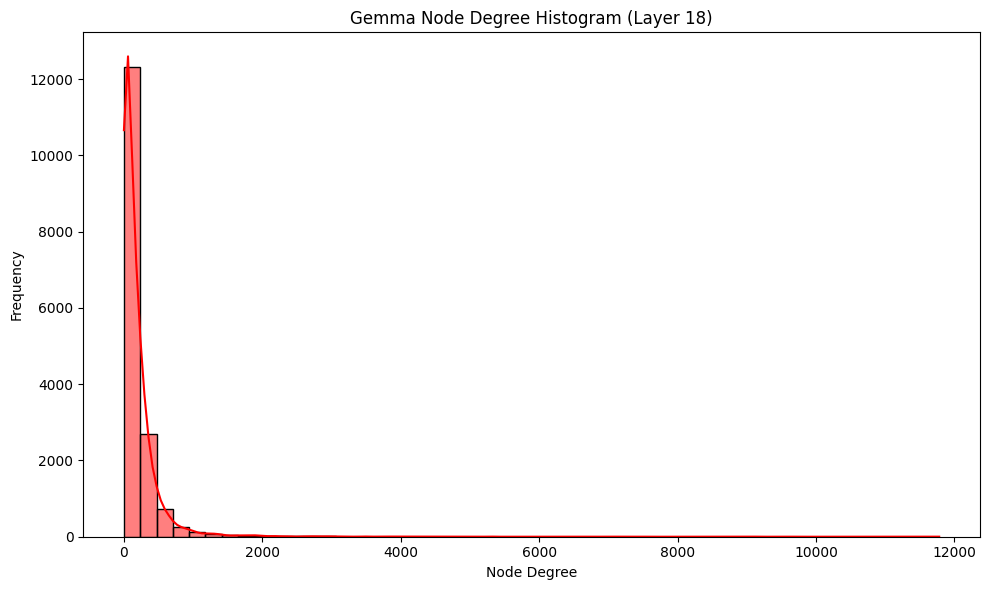

Total number of features: 16384
Maximum degree: 11780
Minimum degree: -1
Average degree: 193.03
Median degree: 102.0


In [24]:
# Plotting histogram of node degree for Gemma
fig, ax = plt.subplots(figsize=(10, 6))

# Correct calculation of node degrees
degrees_layer_18 = (
    np.sum(raw_matrix_layer_18_no_special > 0, axis=1) - 1
)  # Subtract 1 to exclude self-connections

# Plotting for Gemma
sns.histplot(degrees_layer_18, ax=ax, bins=50, kde=True, color="red")
ax.set_title("Gemma Node Degree Histogram (Layer 18)")
ax.set_xlabel("Node Degree")
ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# Print some statistics
print(f"Total number of features: {len(degrees_layer_18)}")
print(f"Maximum degree: {np.max(degrees_layer_18)}")
print(f"Minimum degree: {np.min(degrees_layer_18)}")
print(f"Average degree: {np.mean(degrees_layer_18):.2f}")
print(f"Median degree: {np.median(degrees_layer_18)}")

/Users/matthew/Library/Caches/pypoetry/virtualenvs/sae-cooccurence-DZTJ6ajw-py3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/matthew/Library/Caches/pypoetry/virtualenvs/sae-cooccurence-DZTJ6ajw-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


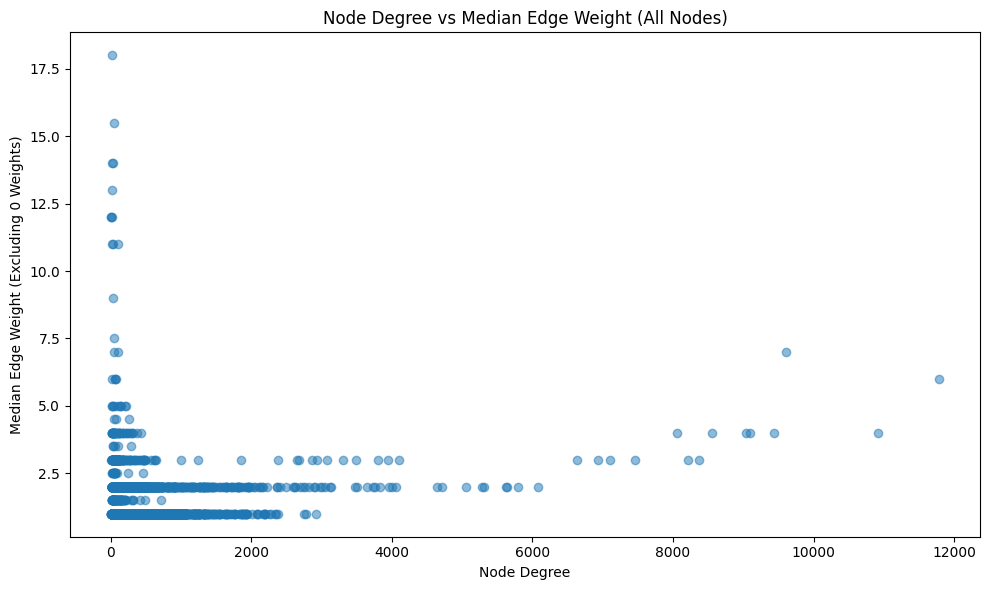

Correlation coefficient between node degree and median edge weight (excluding 0 weights): nan


In [25]:
# Calculate node degrees and median edge weights for all nodes, excluding 0 weight edges
degrees = np.sum(raw_matrix_layer_18_no_special > 0, axis=1)
median_weights = np.array(
    [np.median(row[row > 0]) for row in raw_matrix_layer_18_no_special]
)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(degrees, median_weights, alpha=0.5)
plt.xlabel("Node Degree")
plt.ylabel("Median Edge Weight (Excluding 0 Weights)")
plt.title("Node Degree vs Median Edge Weight (All Nodes)")

# Add a trend line
z = np.polyfit(degrees, median_weights, 1)
p = np.poly1d(z)
plt.plot(degrees, p(degrees), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

# Print correlation coefficient
correlation = np.corrcoef(degrees, median_weights)[0, 1]
print(
    f"Correlation coefficient between node degree and median edge weight (excluding 0 weights): {correlation:.4f}"
)

In [26]:
# Calculate node degrees for layer 18
degrees_layer_18 = (
    np.sum(raw_matrix_layer_18_no_special > 0, axis=1) - 1
)  # Subtract 1 to exclude self-connections

# Get indices of features with degree > 10,000
high_degree_indices = np.where(degrees_layer_18 > 2000)[0]
low_degree_indices = np.where(degrees_layer_18 <= 2000)[0]

print(f"Number of features with degree > 2,000: {len(high_degree_indices)}")
print("Indices of high-degree features:")
print(high_degree_indices)
print(f"Number of features with degree <= 2,000: {len(low_degree_indices)}")
print("Indices of low-degree features:")
print(low_degree_indices)

# Print some additional statistics
print(f"\nTotal number of features: {len(degrees_layer_18)}")
print(f"Maximum degree: {np.max(degrees_layer_18)}")
print(f"Minimum degree: {np.min(degrees_layer_18)}")
print(f"Average degree: {np.mean(degrees_layer_18):.2f}")
print(f"Median degree: {np.median(degrees_layer_18)}")

Number of features with degree > 2,000: 85
Indices of high-degree features:
[  387   427   500   700  1007  1269  1506  1574  1645  2087  2152  2199
  2252  2568  2742  2834  3019  3242  3393  3639  3848  3851  3865  3906
  4118  4182  4257  4586  4602  4651  4934  5540  5636  5803  5807  5850
  6026  6445  6657  7373  7481  7915  8057  8073  8153  8206  8578  9223
  9392  9502  9518  9877 10108 10277 10297 10340 10642 10729 10992 11271
 11918 12014 12106 12368 12554 12685 12704 12764 13249 13430 13727 14445
 14489 14754 14796 14830 15172 15209 15275 15394 15612 15817 16017 16153
 16207]
Number of features with degree <= 2,000: 16299
Indices of low-degree features:
[    0     1     2 ... 16381 16382 16383]

Total number of features: 16384
Maximum degree: 11780
Minimum degree: -1
Average degree: 193.03
Median degree: 102.0
